In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

## Load the data

In [2]:
X=np.load('dataset_diabetes/X_array.npy',allow_pickle=True)
readmission=np.load('dataset_diabetes/Y.npy',allow_pickle=True)
encounter_id=np.load('dataset_diabetes/encounter_id.npy',allow_pickle=True)
patient_nbr=np.load('dataset_diabetes/patient_nbr.npy',allow_pickle=True)

## One Hot encoding and SVD

In [3]:
binarydat=OneHotEncoder().fit_transform(X)
print(binarydat.shape)
svd = TruncatedSVD(n_components=3, n_iter=7, algorithm='arpack',random_state=4)
compss = svd.fit_transform(binarydat)

(101766, 468)


# Plot

In [4]:
uniq_colors=['navy','cyan','teal','darkviolet','hotpink','maroon','peru','gold','forestgreen','palegreen','red','pink','lavender','indigo'] 
#https://matplotlib.org/stable/gallery/color/named_colors.html
def make_3_plots(pc1,pc2,pc3,labels): #makes plots of  comp 1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'SVD 1': pc1.values,'SVD 2': pc2.values,'SVD 3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['SVD 1'],drug1['SVD 2'],c=uniq_colors[i],label=r,alpha=0.04)
        ax.set_xlabel('SVD 1')
        ax.set_ylabel('SVD 2')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['SVD 1'],drug1['SVD 3'],c=uniq_colors[i],label=r,alpha=0.04)
        ax.set_xlabel('SVD 1')
        ax.set_ylabel('SVD 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['SVD 2'],drug1['SVD 3'],c=uniq_colors[i],label=r,alpha=0.04)
        ax.set_xlabel('SVD 2')
        ax.set_ylabel('SVD 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

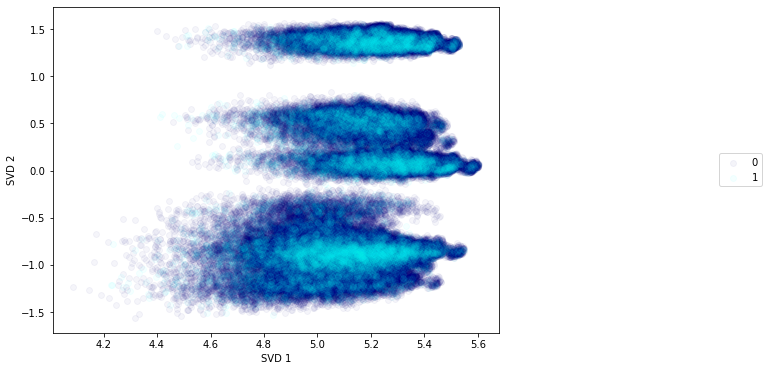

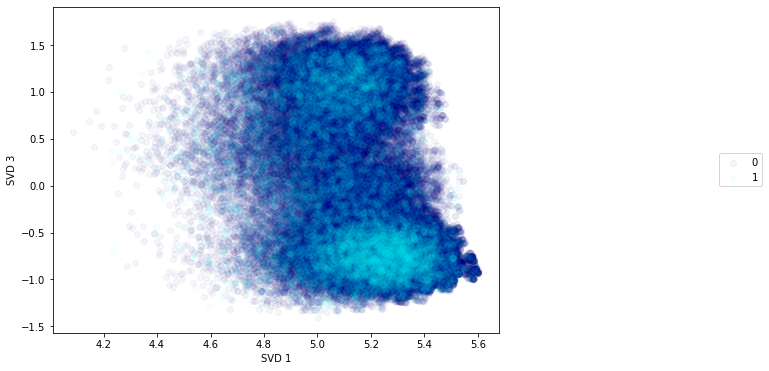

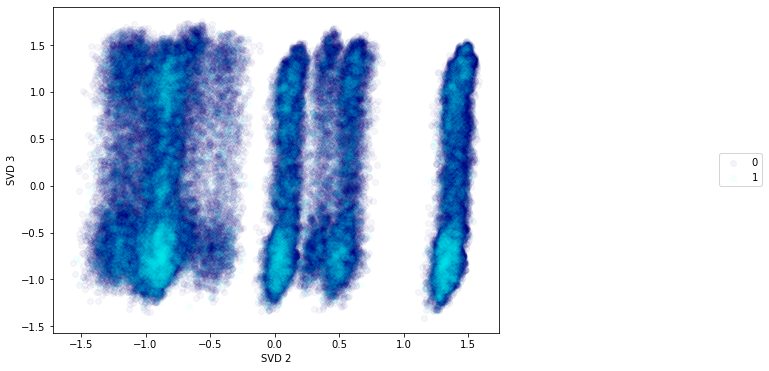

In [5]:
    #make into dataframe if you want to view with labels
my_list = np.where(readmission == 'NO', 0, readmission)
my_list2 = np.where(my_list == '>30', 0, my_list)
Y0 = np.where(my_list2 == '<30', 1, my_list2)
Y=list(Y0)
componentDf = pd.DataFrame(data = compss, columns = ['SVD 1', 'SVD 2', 'SVD 3'])
c1=componentDf['SVD 1'] #make into numpy arrays
c2=componentDf['SVD 2']
c3=componentDf['SVD 3']
labels=Y
make_3_plots(c1,c2,c3,labels)

# View explained variance of each component

In [6]:
svd.fit_transform(binarydat)
svd.explained_variance_

array([0.03972705, 0.87506299, 0.68434217])

# Explained variance is highest for component 2, and also high for component 3

This makes sense looking at the above plots

Let's use component 2 to select features, but also component 3. Component 2 does have a higher explained variance value but component 3 visually separates our variable of interest (readmittance). Since at a glance it seems to slightly separate the data better, I want to try component 3 in addition to component 2.

In [7]:
component2=svd.components_[1,:] #skip 0
component3=svd.components_[2,:]

In [8]:
np.min(component2)

-0.4739440598285003

In [9]:
np.max(component2)

0.46138370039092197

In [10]:
component2

array([ 9.69474107e-03, -2.22593046e-02,  4.20406190e-06,  2.29104550e-04,
       -8.82386262e-04, -1.92726149e-03, -6.12667652e-04, -5.89781021e-03,
       -1.05821539e-02, -1.62023751e-02,  3.25928610e-03,  1.45375201e-02,
        5.51838441e-03, -1.52229699e-02, -7.35000113e-03,  3.27145244e-03,
        1.73672953e-05, -6.86534992e-03,  1.41517705e-02, -5.55573747e-06,
       -5.57072944e-04,  1.11345281e-03,  2.23313247e-03, -1.89770080e-02,
        9.61778634e-04,  1.11905805e-03, -1.75039811e-02,  4.90935479e-04,
        1.52228445e-04, -9.53614388e-05,  3.07250962e-05,  3.98328411e-03,
        4.64557194e-05,  1.50377466e-04,  4.16063652e-04, -1.34076581e-04,
       -5.26823460e-05, -5.29017460e-05,  1.88425828e-02,  7.24029806e-05,
       -1.14579290e-05, -4.55099988e-03, -1.52412061e-03, -1.59470325e-05,
        9.50744745e-04,  2.47962697e-05, -2.29841570e-04,  8.68742904e-03,
        4.07008303e-04,  5.98105369e-04,  2.37360167e-03,  2.57145186e-03,
        3.32987748e-03, -